# Лабораторна робота № 1

## ЗАВДАННЯ I1 ТА I2 ДО ЛАБОРАТОРНОЇ РОБОТИ 1

- I1. Побудйте математичну модель задачi лiнiйного програмування.

- I2. Побудйте математичну модель загальної розподiльної задачi
лiнiйного програмування та розв’яжiть її з допомогою комп’ютера.

### Побудйте математичну модель задачi лiнiйного програмування.

#### Варіант 6

Продукцiєю мiського молочного заводу є молоко, кефiр i сметана. На виробництво 1 т молока, кефiру i сметани потрiбно вiдповiдно 1200, 1300 i 9200 кг молока. При цьому витрати робочого часу при розливi 1 т молока i кефiру складають 0,3 i 0,2 машино-годин. На розфасовцi 1 т сметани зайнятi спецiальнi автомати протягом 3 год. Всього для виробництва цiльномолочної продукцiї завод може використовувати 150 000 кг молока. Основне устаткування може бути зайняте протягом 25 машино-годин, а автомати по розфасовцi сметани – протягом 17 год. Прибуток вiд реалiзацiї 1 т молока, кефiру i сметани вiдповiдно рiвний 50, 41 i 90 грошових одиниць. Завод повиннен щодня випускати не менше 165 т молока. Побудуйте математичну модель, яка дозволяє визначити обсяги випуску молочної продукцiї, що дозволяють отримати найбiльший прибуток.

#### Розв'язок

Нехай $x_1$, $x_2$, $x_3$ - обсяги випуску молока, кефiру i сметани вiдповiдно.


Тоді обмеження задачі такі:

1. Використання молока: $1200x_1 + 1300x_2 + 9200x_3 \leq 150000$
2. Використання робочого часу: $0.3x_1 + 0.2x_2 \leq 25$
3. Використання автоматів: $3x_3 \leq 17$
4. Мінімальний обсяг молока: $x_1 \geq 165$
5. $x_1, x_2, x_3 \geq 0$

Цільова функція: $50x_1 + 41x_2 + 90x_3 \rightarrow max$

Тоді математична модель:


$P = 50x_1 + 41x_2 + 90x_3 \rightarrow max$

\begin{cases}

1200x_1 + 1300x_2 + 9200x_3 \leq 150000 \\
0.3x_1 + 0.2x_2 \leq 25 \\
3x_3 \leq 17 \\
x_1 \geq 165 \\
x_1, x_2, x_3 \geq 0

\end{cases}


In [35]:
import pulp # Імпортуємо бібліотеку PuLP для розв'язання задач лінійного програмування

In [36]:
problem = pulp.LpProblem("Dairy_Plant_Profit_Maximization", pulp.LpMaximize)

milk = pulp.LpVariable("Milk", lowBound=0)
kefir = pulp.LpVariable("Kefir", lowBound=0)
sour_cream = pulp.LpVariable("SourCream", lowBound=0)

problem += 50 * milk + 41 * kefir + 90 * sour_cream, "Total_Profit"

problem += 1200 * milk + 1300 * kefir + 9200 * sour_cream <= 150000, "Milk_Usage"

problem += 0.3 * milk + 0.2 * kefir <= 25, "Basic_Equipment_Hours"

problem += 3 * sour_cream <= 17, "Packaging Machine Hours"

problem += milk >= 165, "Minimum Milk Production"

problem.solve()

milk_production = milk.varValue
kefir_production = kefir.varValue
sour_cream_production = sour_cream.varValue
total_profit = pulp.value(problem.objective)

milk_production, kefir_production, sour_cream_production, total_profit

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/me/Projects/methods-optimis/.venv/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/7bf3e1647a374130844566ba1a5809ff-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/7bf3e1647a374130844566ba1a5809ff-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 20 RHS
At line 25 BOUNDS
At line 26 ENDATA
Problem MODEL has 4 rows, 3 columns and 7 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
0  Obj -0 Primal inf 109.73751 (1) Dual inf 179.38548 (3)
0  Obj -0 Primal inf 109.73751 (1) Dual inf 8.8570005e+09 (3)
2  Obj 4655.7971 Primal inf 54.314527 (1)
Primal infeasible - objective value 4655.7971
PrimalInfeasible objective 4655.797101 - 2 iterations ti

(83.333333, 0.0, 5.4347826, 4655.797084)

### Побудйте математичну модель загальної розподiльної задачi лiнiйного програмування та розв’яжiть її з допомогою комп’ютера

#### Варіант 6

Побудйте математичну модель загальної розподiльної задачi
лiнiйного програмування та розв’яжiть її з допомогою комп’ютера.
На пiдприємствi випускається m видiв харчових продуктiв. При
цьому використовується устаткування n типiв. Вiдомi наступнi данi
про виробничий процес:

- добова продуктивнiсть $λ_{ij}$ , i ∈ {1, . . . , m}, j ∈ {1, . . . , n}, устаткування кожного виду продукцiї, т/добу;
- собiвартiсть $c_{ij}$ , i ∈ {1, . . . , m}, j ∈ {1, . . . , n}, виробництва продукцiї, гр.од./т;
- планований обсяг випуску продукцiї $a_i$ , i ∈ {1, . . . , m}, т;
- фонди робочого часу устаткування $b_j$ , j ∈ {1, . . . , n}, доба.

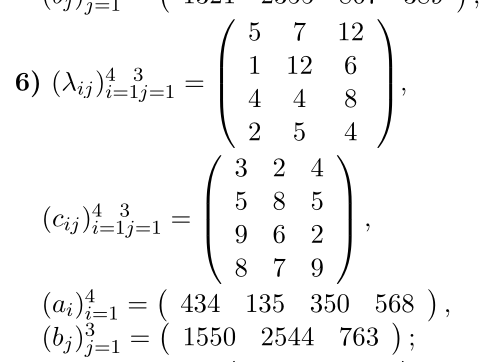

In [37]:
# Provided data from the images
lambda_ij = [
    [5, 7, 12],
    [1, 12, 6],
    [4, 4, 8],
    [2, 5, 4],
]

c_ij = [
    [3, 2, 4],
    [5, 8, 5],
    [9, 6, 2],
    [8, 7, 9],
]

a_i = [434, 135, 350, 568]
b_j = [1550, 2544, 763]

prob = pulp.LpProblem("Minimize_Production_Costs", pulp.LpMinimize)

x = pulp.LpVariable.dicts(
    "Production",
    ((i, j) for i in range(len(a_i)) for j in range(len(b_j))),
    lowBound=0,
    cat="Continuous",
)

prob += pulp.lpSum(
    [c_ij[i][j] * x[(i, j)] for i in range(len(a_i)) for j in range(len(b_j))]
)

for i in range(len(a_i)):
    prob += (
        pulp.lpSum([x[(i, j)] for j in range(len(b_j))]) == a_i[i],
        f"ProductionVolume_{i}",
    )

# Constraints for equipment working time for each equipment type
for j in range(len(b_j)):
    prob += (
        pulp.lpSum([x[(i, j)] * (1.0 / lambda_ij[i][j]) for i in range(len(a_i))])
        <= b_j[j],
        f"EquipmentTime_{j}",
    )

prob.solve()

pulp.LpStatus[prob.status], pulp.value(prob.objective), {v.name: v.varValue for v in prob.variables()}

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/me/Projects/methods-optimis/.venv/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/3ab1a372cf584187858c7d27a4b4abd3-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/3ab1a372cf584187858c7d27a4b4abd3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 49 RHS
At line 57 BOUNDS
At line 58 ENDATA
Problem MODEL has 7 rows, 12 columns and 24 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-7) rows, 0 (-12) columns and 0 (-24) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 6219
After Postsolve, objective 6219, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 6219 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds

('Optimal',
 6219.0,
 {'Production_(0,_0)': 0.0,
  'Production_(0,_1)': 434.0,
  'Production_(0,_2)': 0.0,
  'Production_(1,_0)': 135.0,
  'Production_(1,_1)': 0.0,
  'Production_(1,_2)': 0.0,
  'Production_(2,_0)': 0.0,
  'Production_(2,_1)': 0.0,
  'Production_(2,_2)': 350.0,
  'Production_(3,_0)': 0.0,
  'Production_(3,_1)': 568.0,
  'Production_(3,_2)': 0.0})